# ***Loading Important Libraries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier


# ***Importing The Bankrupt Dataset***

In [2]:
data= pd.read_csv("C:\\Users\\pratiksha\\Documents\\Excelar\\Project 212\\Bankruptcy-Prevention.csv", sep=';',header=0)
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ***Exploratory Data Analysis***

In [4]:
data.shape

(250, 7)

In [5]:
data.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


# ***Checking missing values***

In [7]:
data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

***There is no missing value in bankrupcy_prevention dataset.***

# ***Transformation***

***Create Dummy Variable***

In [8]:
data = pd.get_dummies(data,columns=[' class'],drop_first=True)
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_non-bankruptcy
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


***Changing the target variable to bankrupcy=0, non_bankrupcy=1***

In [9]:

# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data)
# predictions
y_pred_outliers = clf.predict(data)
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

***Here 1 are normal data and -1 are outliers.***

In [10]:
data['scores']=clf.decision_function(data)
data['anomaly']=clf.predict(data.iloc[:,0:7])
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_non-bankruptcy,scores,anomaly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.145712,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.179722,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.089607,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.067834,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.215060,1
...,...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1,0.104623,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1,0.091653,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1,0.088232,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1,0.068579,1


In [11]:
#Print Anomaly
data[data['anomaly']==-1]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_non-bankruptcy,scores,anomaly
27,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.000517,-1
72,1.0,0.5,1.0,0.5,0.0,0.0,0,-0.044748,-1
192,0.5,1.0,0.0,0.0,1.0,0.0,1,-0.002184,-1


***Index 27,72,192 are outliers ,so we will drop them and reset the index.***

In [12]:
data = data.drop(data.index[[27, 72, 192]], axis=0)
data.reset_index(drop=True,inplace = True)
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_non-bankruptcy,scores,anomaly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.145712,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.179722,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.089607,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.067834,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.215060,1
...,...,...,...,...,...,...,...,...,...
242,0.0,1.0,1.0,1.0,1.0,1.0,1,0.104623,1
243,1.0,1.0,0.5,1.0,1.0,0.0,1,0.091653,1
244,0.0,1.0,1.0,0.5,0.5,0.0,1,0.088232,1
245,1.0,0.0,0.5,1.0,0.5,0.0,1,0.068579,1


In [13]:

data[' class_non-bankruptcy'].value_counts()

1    142
0    105
Name:  class_non-bankruptcy, dtype: int64

***In target variable number of bankrupcy=105, nonbankrupcy=142***


# ***Correlation***

In [14]:
data.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_non-bankruptcy,scores,anomaly
industrial_risk,1.000000,0.252156,-0.177370,-0.020930,-0.261510,0.157786,-0.231037,0.115410,NaN
management_risk,0.252156,1.000000,-0.259036,-0.309402,-0.323270,0.226756,-0.387475,0.254155,NaN
financial_flexibility,-0.177370,-0.259036,1.000000,0.523079,0.704967,-0.111869,0.768829,-0.262425,NaN
credibility,-0.020930,-0.309402,0.523079,1.000000,0.685177,-0.293737,0.764076,-0.300837,NaN
competitiveness,-0.261510,-0.323270,0.704967,0.685177,1.000000,-0.209993,0.898224,-0.314888,NaN
operating_risk,0.157786,0.226756,-0.111869,-0.293737,-0.209993,1.000000,-0.281201,0.243246,NaN
class_non-bankruptcy,-0.231037,-0.387475,0.768829,0.764076,0.898224,-0.281201,1.000000,-0.314084,NaN
scores,0.115410,0.254155,-0.262425,-0.300837,-0.314888,0.243246,-0.314084,1.000000,NaN
anomaly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


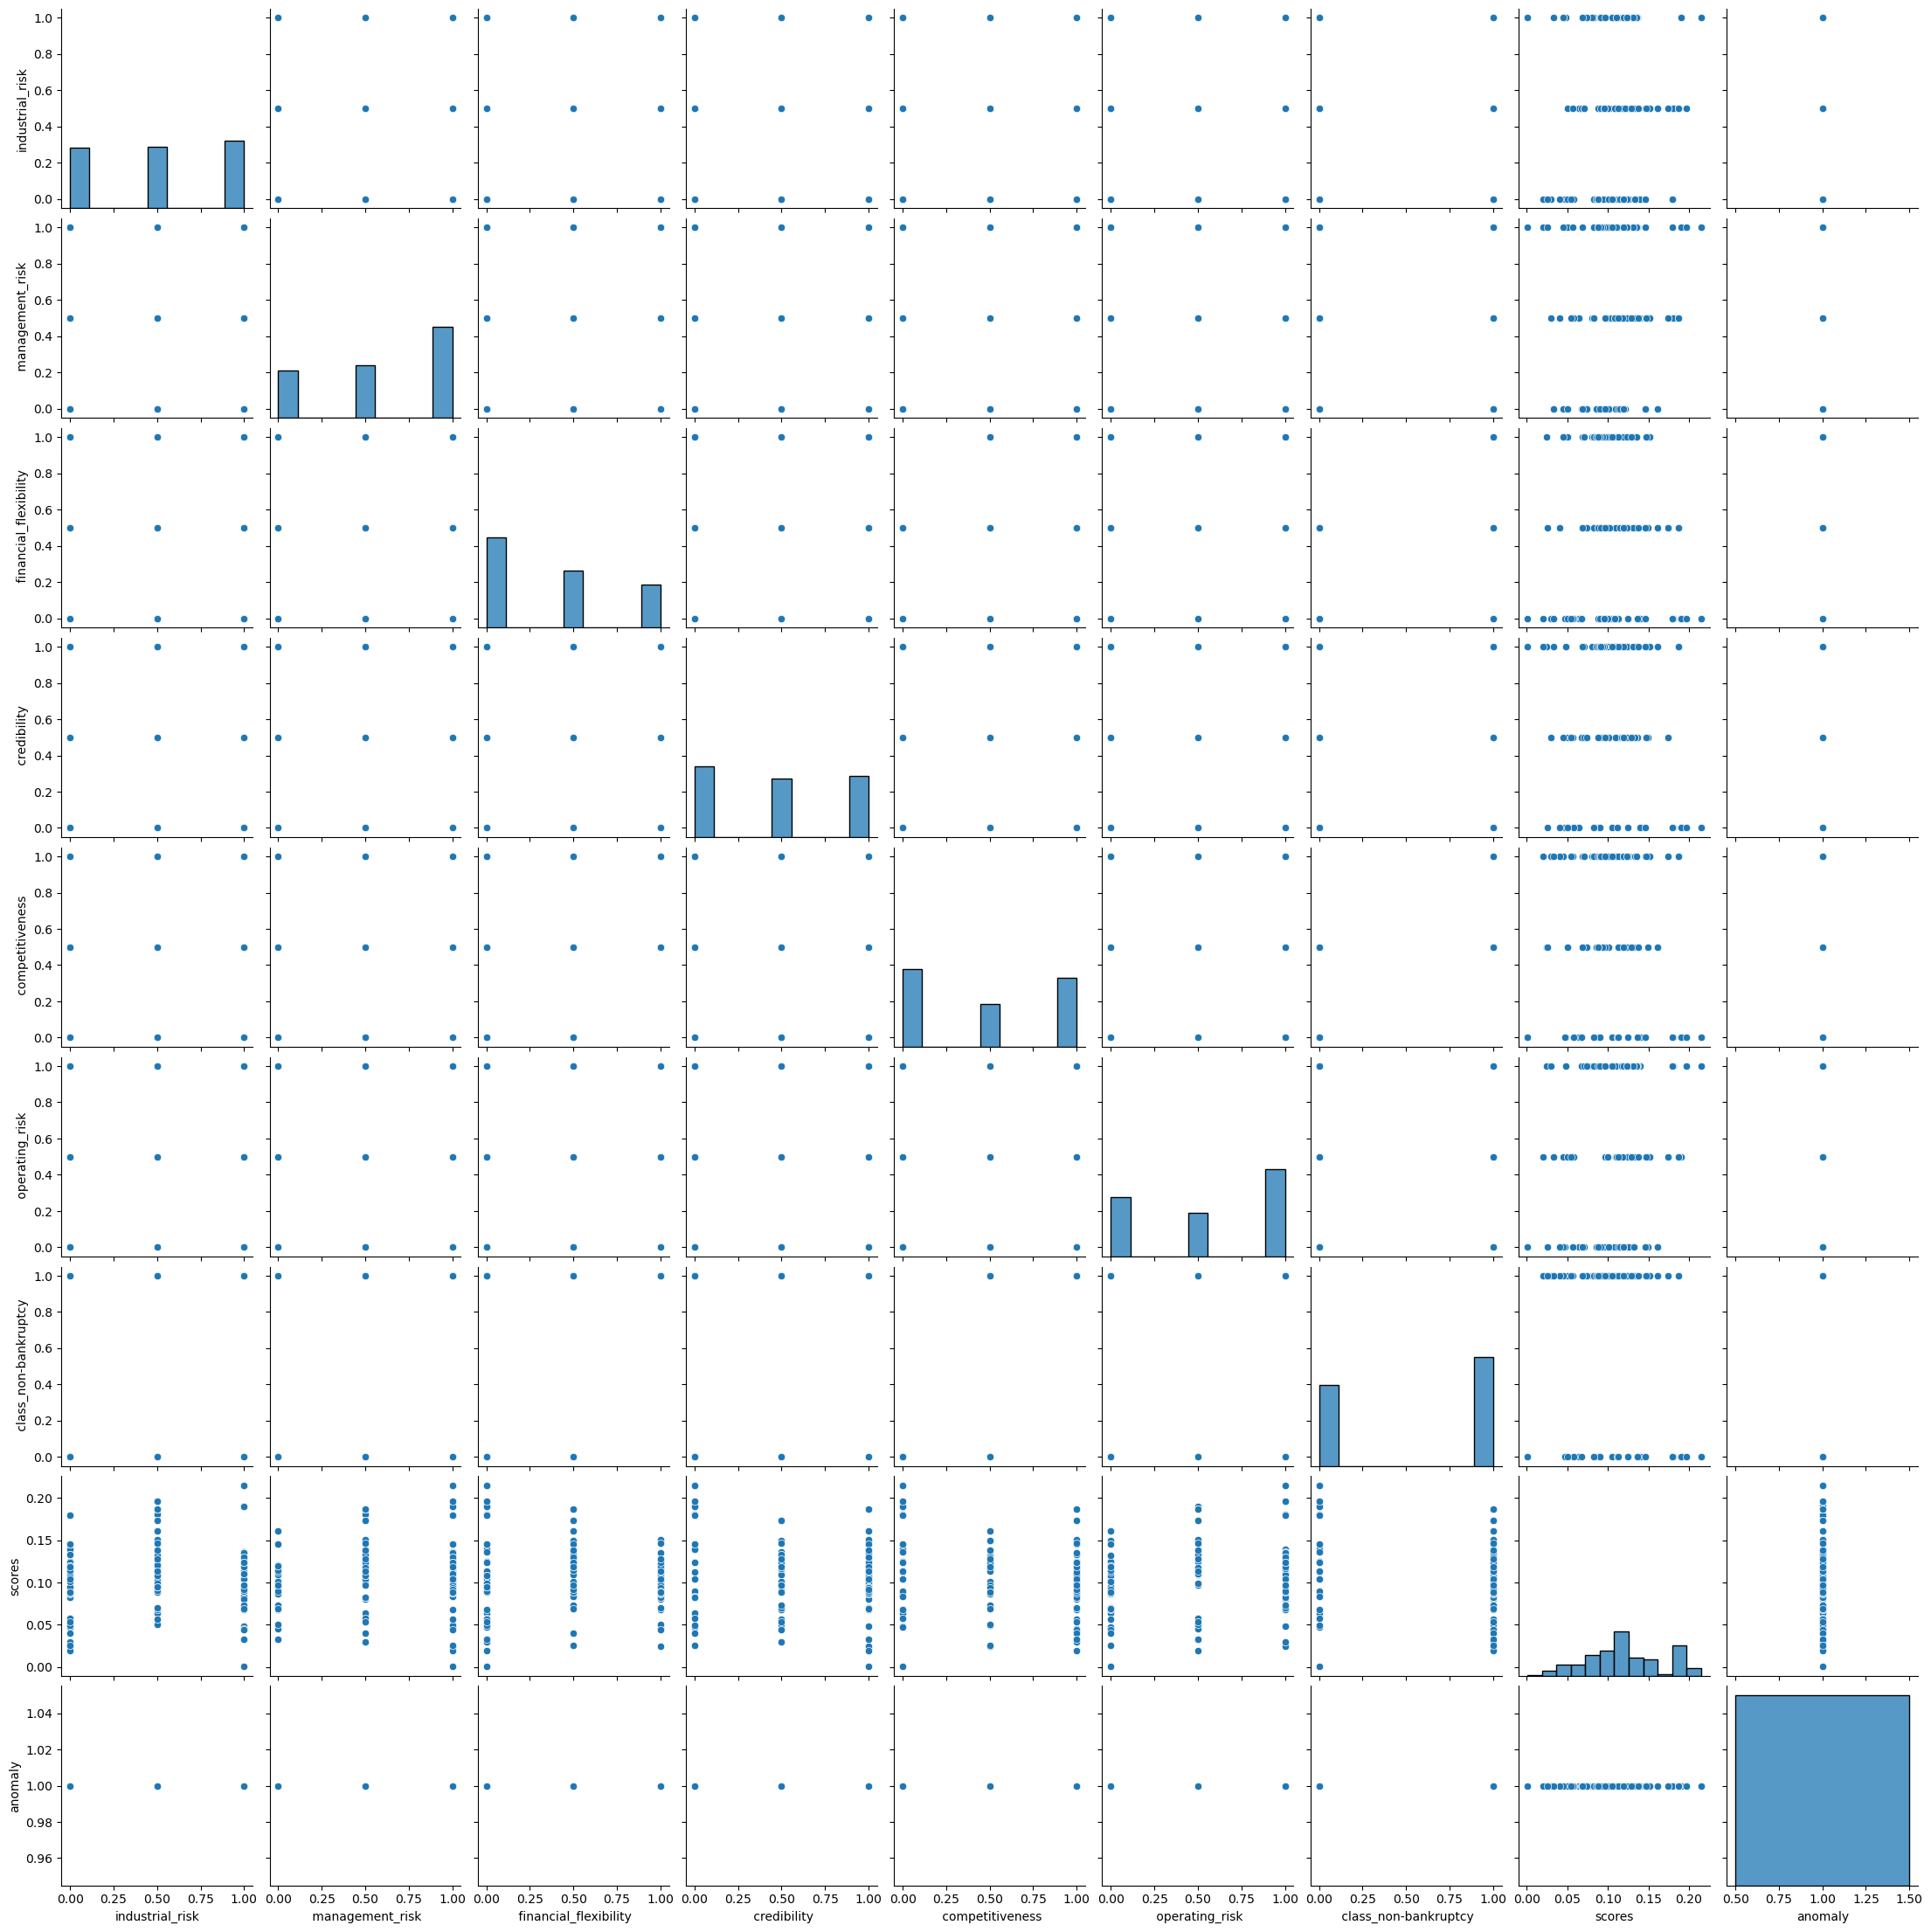

In [15]:
sns.pairplot(data, palette='hls')
plt.show()

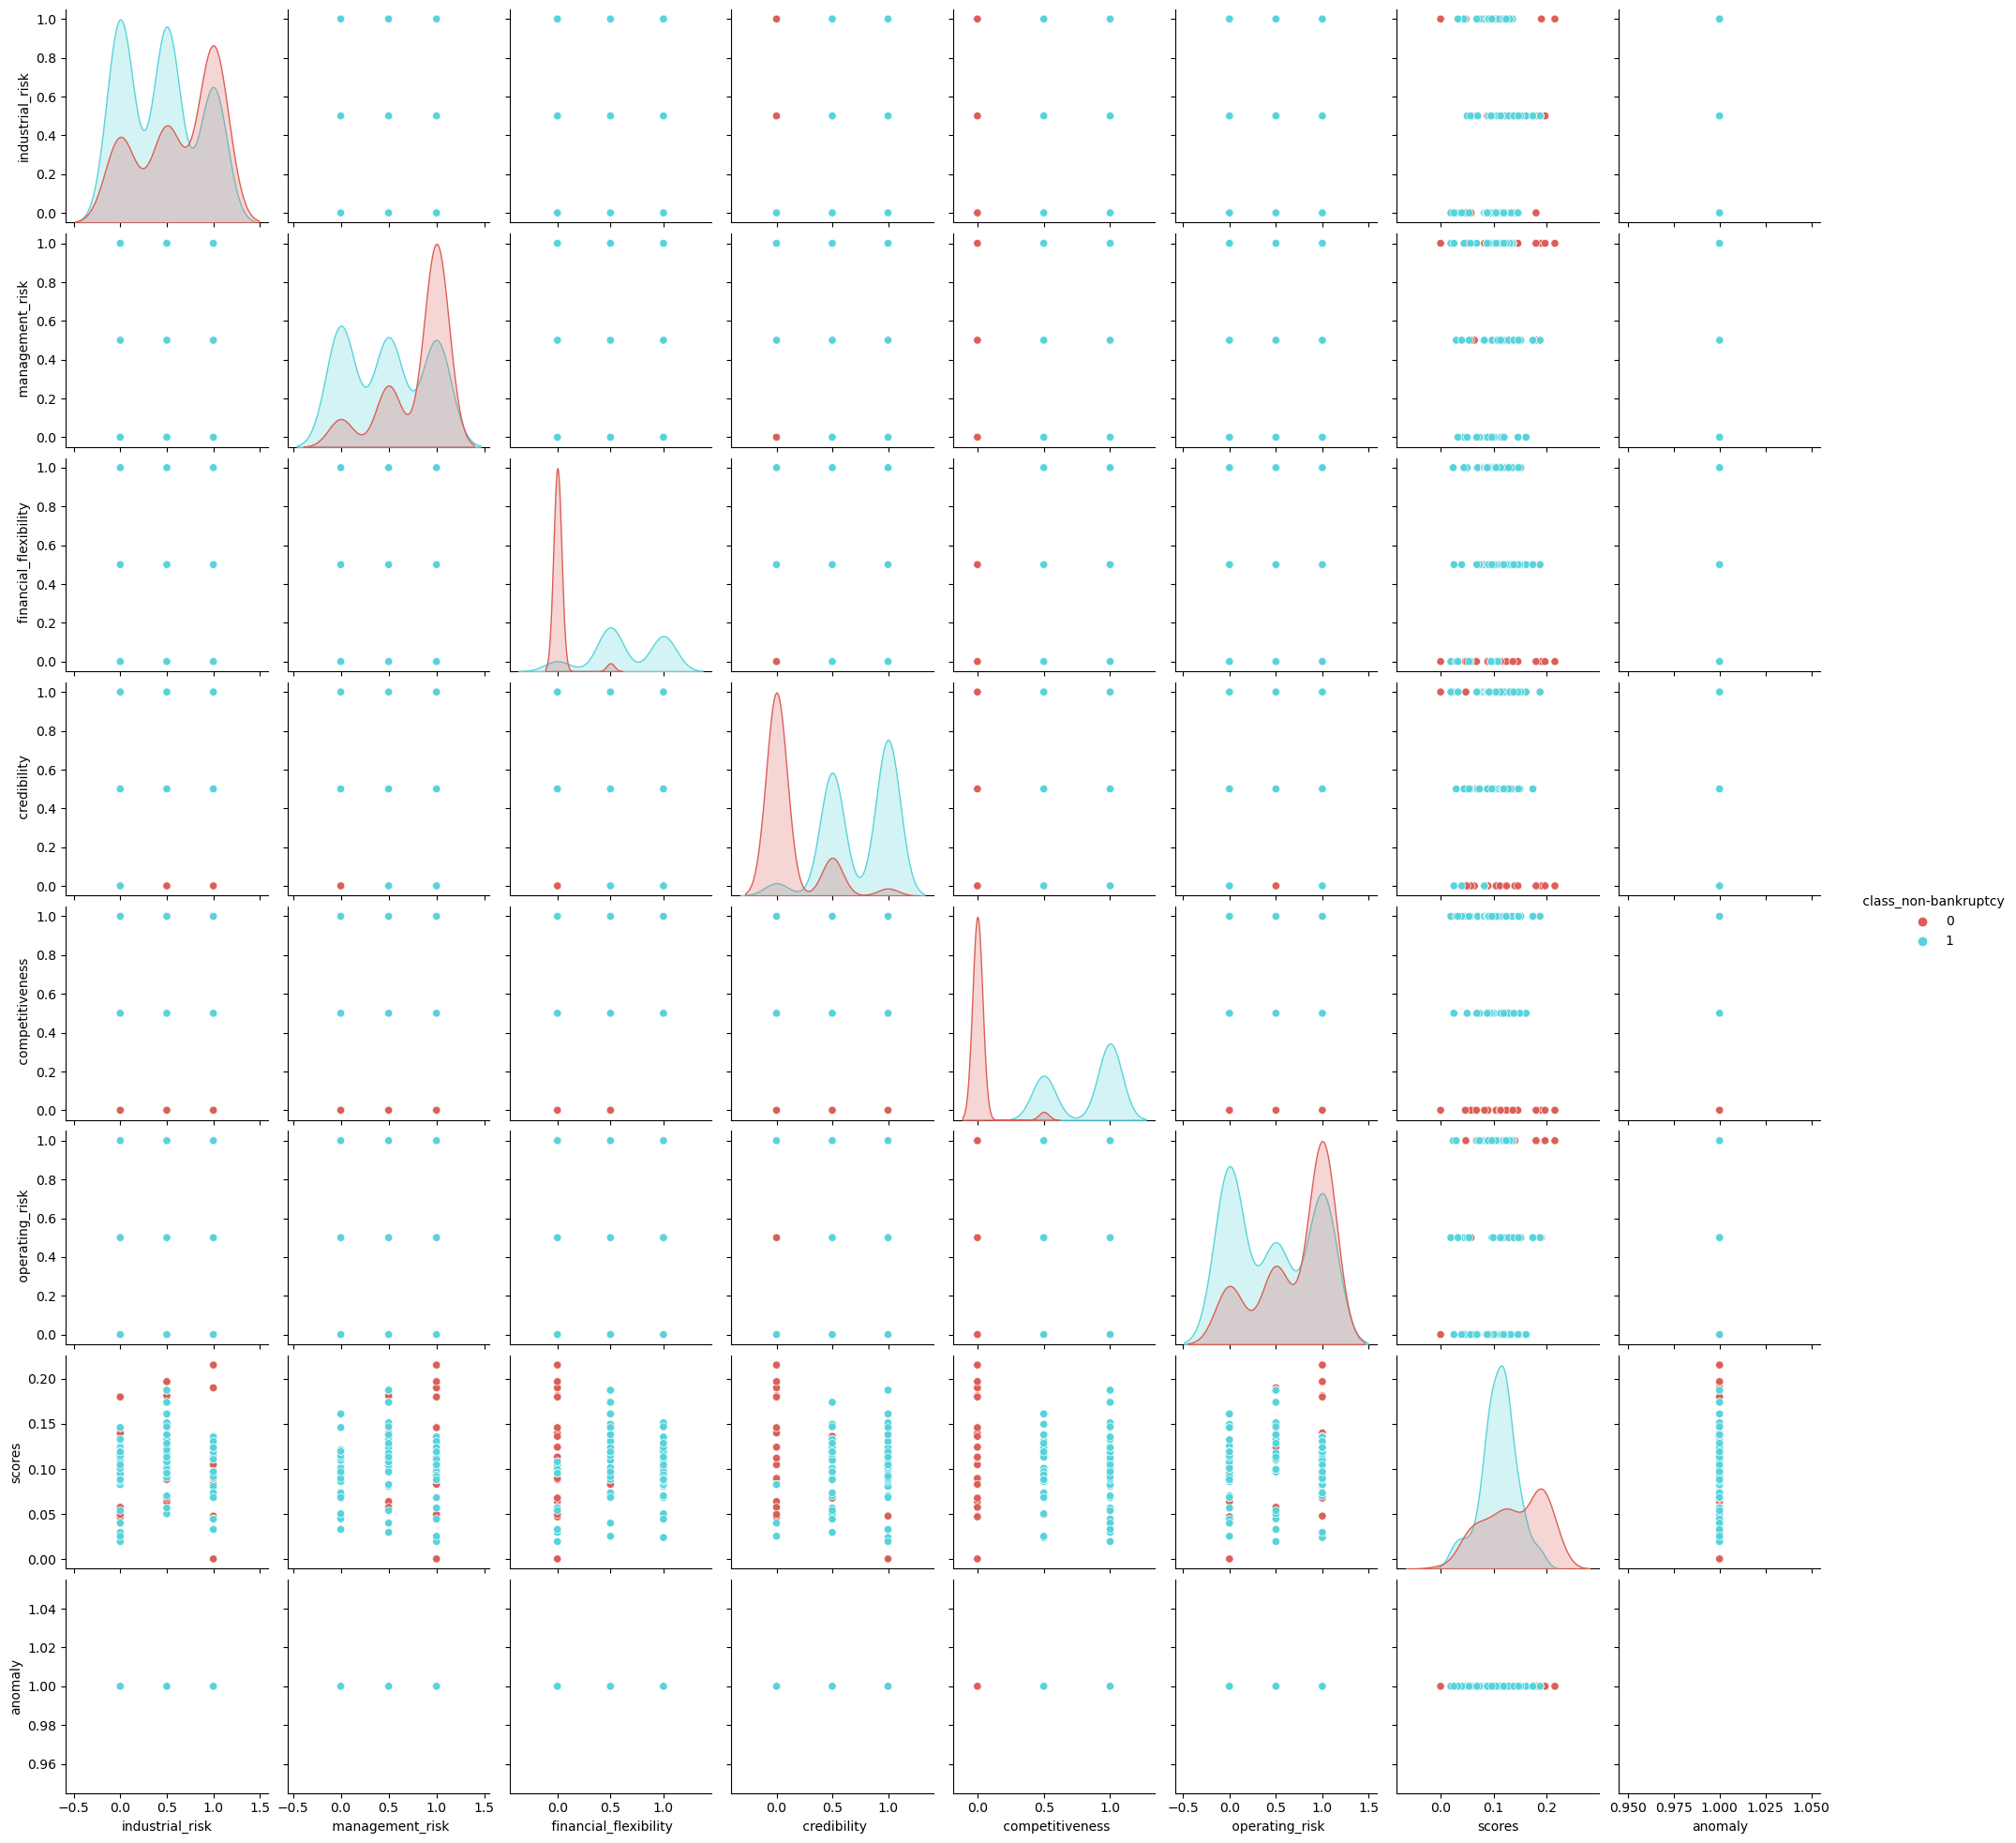

In [16]:
sns.pairplot(data,hue=' class_non-bankruptcy', palette='hls')
plt.show()

# ***Heatmap***

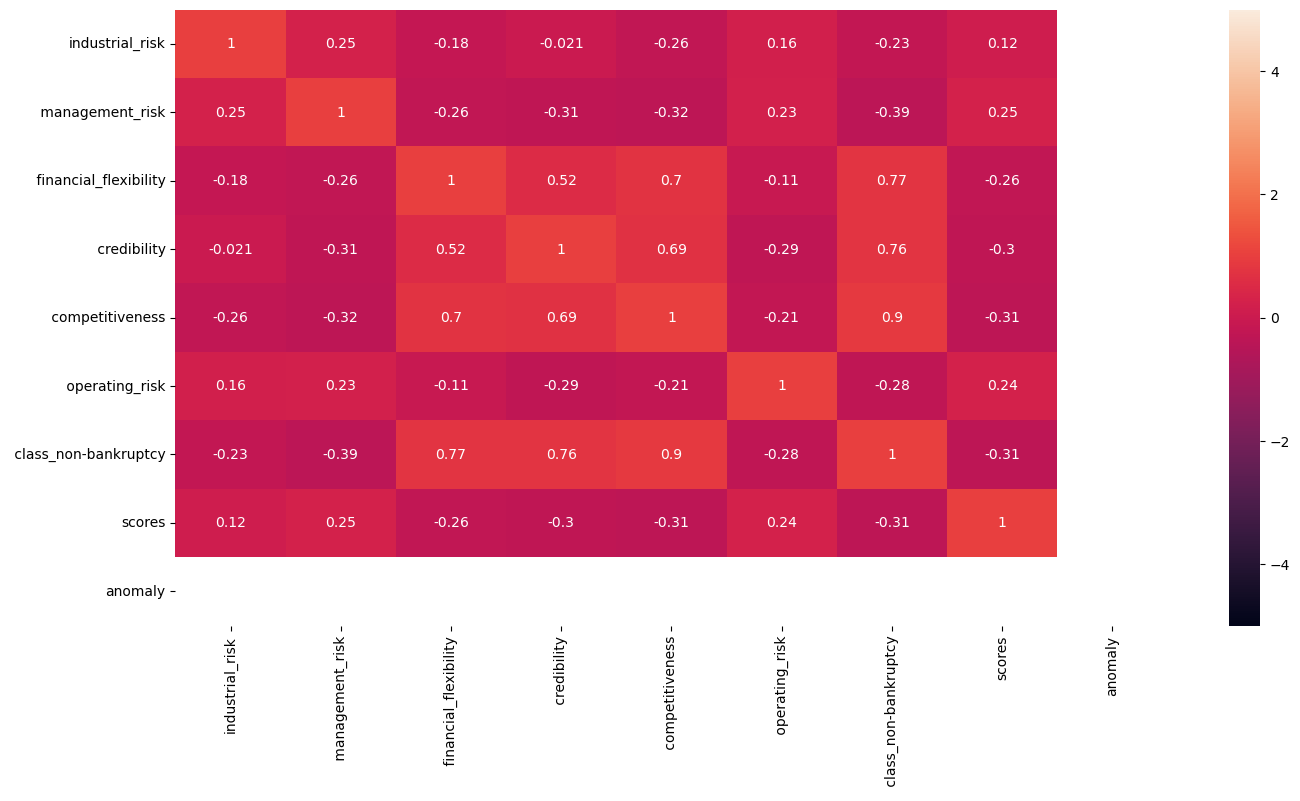

In [17]:
plt.figure(figsize = (16,8))
sns.heatmap(data.corr(), vmin = -5, vmax = 5, annot = True)
#sns.heatmap(data.corr(),annot = True, cmap="pink")
plt.show()

<AxesSubplot:xlabel=' class_non-bankruptcy', ylabel='count'>

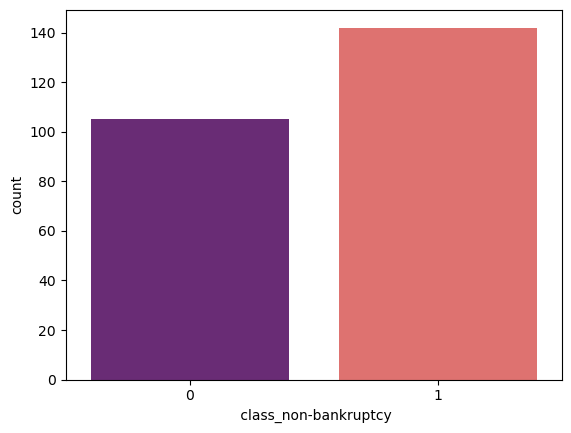

In [18]:
sns.countplot(x = ' class_non-bankruptcy', data = data, palette = 'magma')

<AxesSubplot:xlabel='industrial_risk', ylabel='count'>

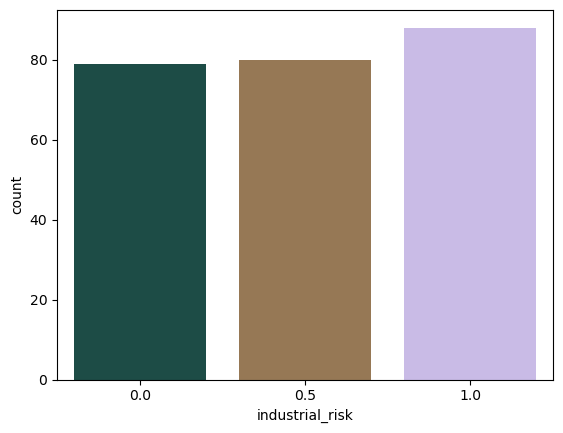

In [19]:
sns.countplot(x = 'industrial_risk', data = data, palette = 'cubehelix')

<AxesSubplot:xlabel=' financial_flexibility', ylabel='count'>

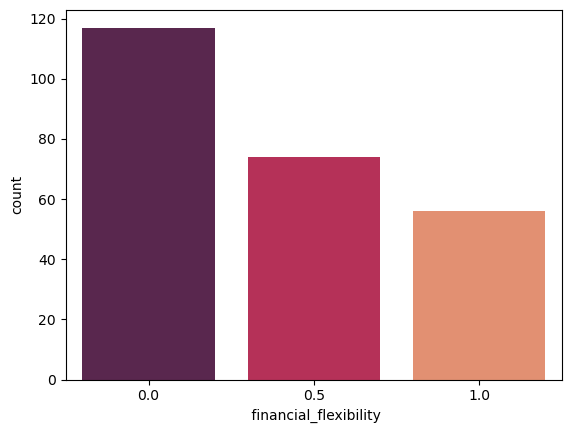

In [20]:
sns.countplot(x = ' financial_flexibility', data = data, palette = 'rocket')

<AxesSubplot:xlabel=' management_risk', ylabel='count'>

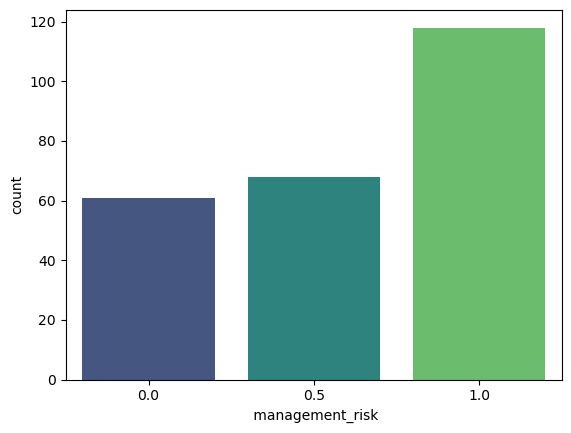

In [21]:
sns.countplot(x = ' management_risk', data = data, palette = 'viridis')

<AxesSubplot:xlabel=' class_non-bankruptcy'>

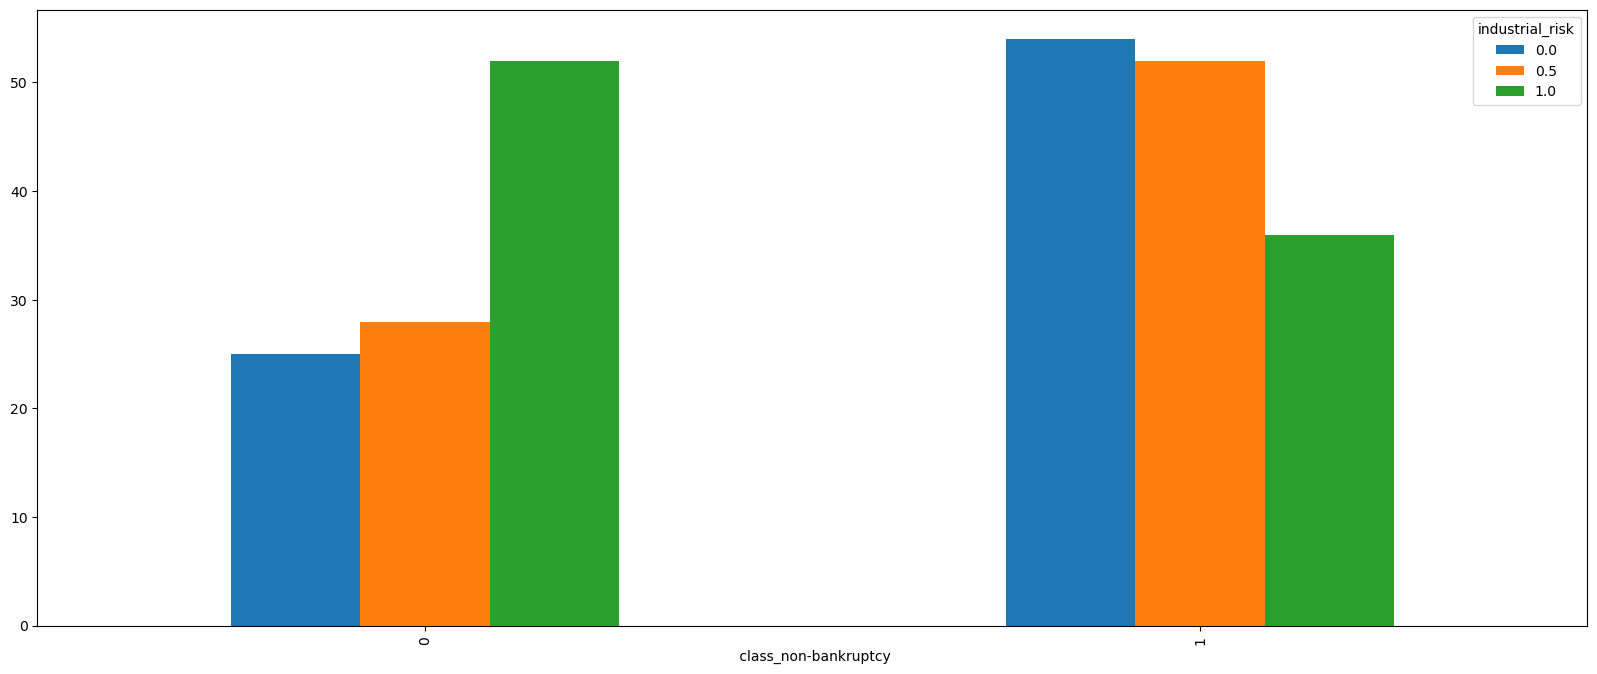

In [22]:
pd.crosstab(data[' class_non-bankruptcy'], data['industrial_risk']).plot(kind='bar',figsize=(20,8))

<AxesSubplot:xlabel=' financial_flexibility'>

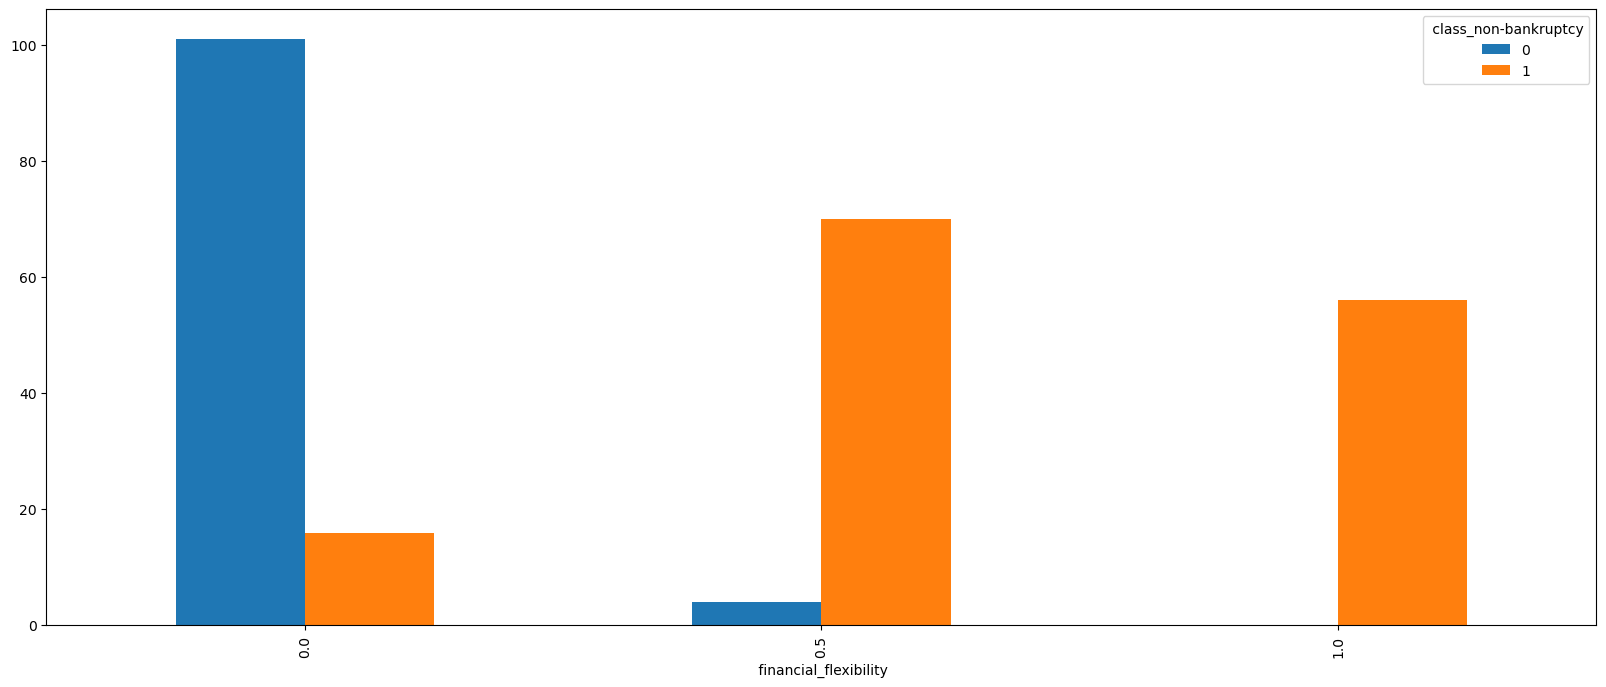

In [23]:
pd.crosstab(data[' financial_flexibility'],data[' class_non-bankruptcy']).plot(kind='bar',figsize=(20,8))

<AxesSubplot:xlabel=' management_risk'>

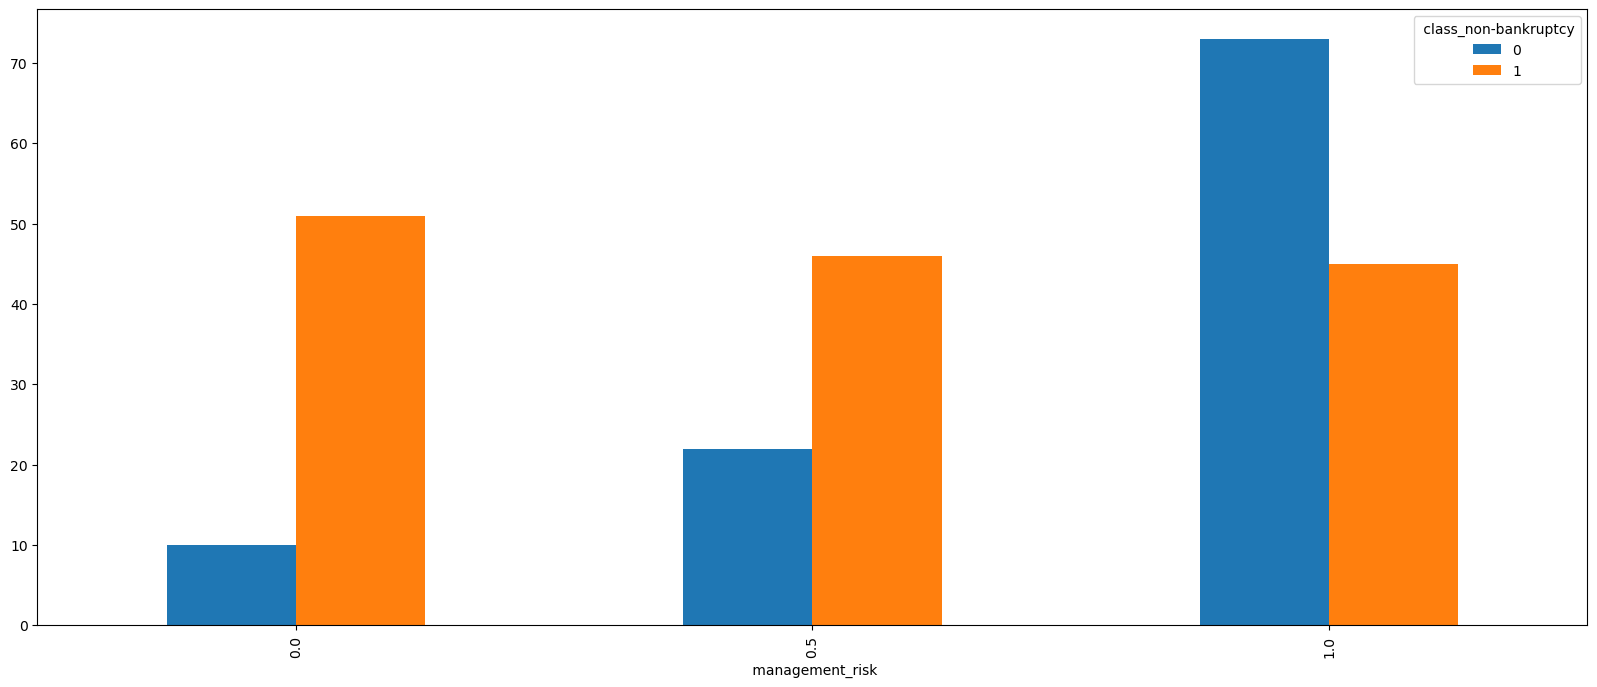

In [24]:
pd.crosstab(data[' management_risk'],data[' class_non-bankruptcy']).plot(kind='bar',figsize=(20,8))

<AxesSubplot:xlabel=' operating_risk'>

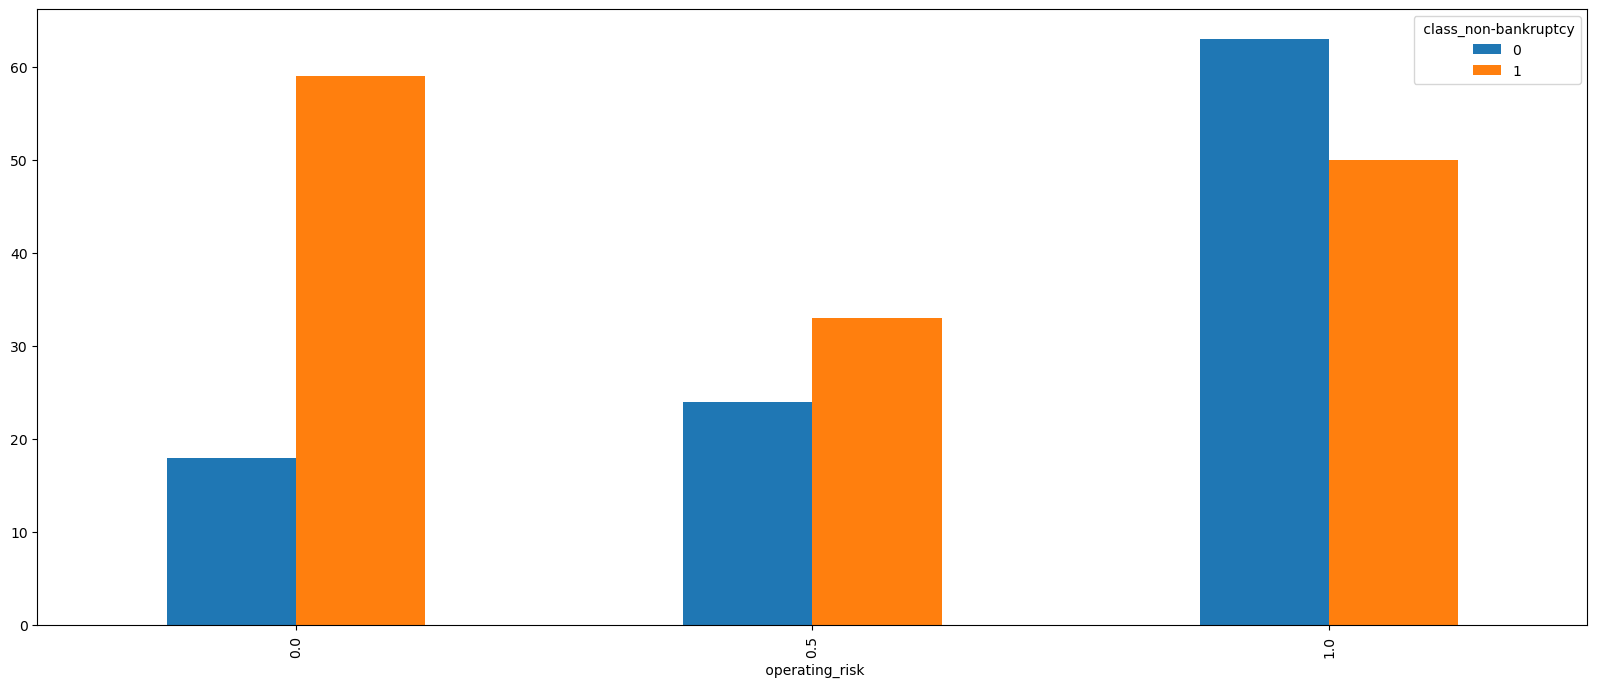

In [25]:
pd.crosstab(data[' operating_risk'],data[' class_non-bankruptcy']).plot(kind='bar',figsize=(20,8))

<AxesSubplot:xlabel=' competitiveness'>

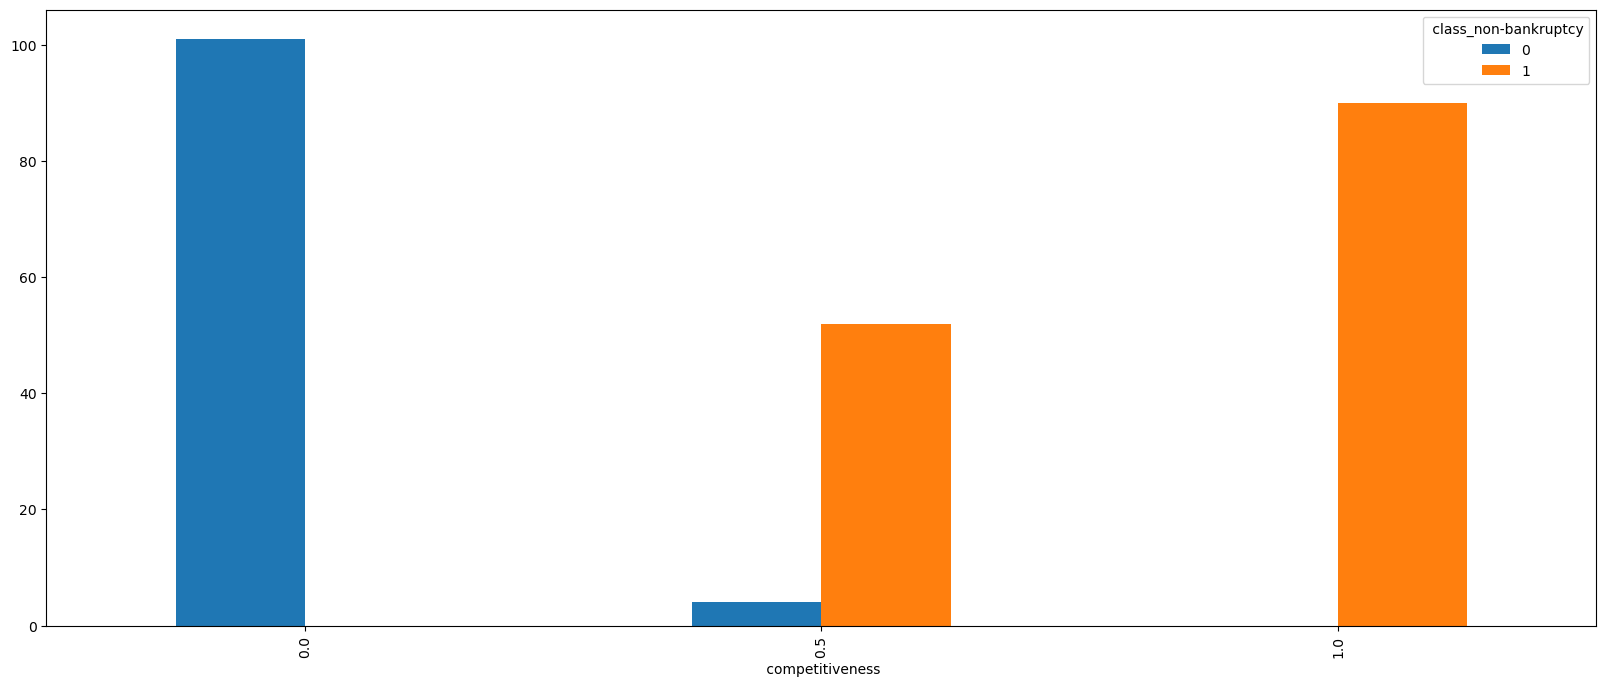

In [26]:

pd.crosstab(data[' competitiveness'],data[' class_non-bankruptcy']).plot(kind='bar',figsize=(20,8))


<AxesSubplot:xlabel=' financial_flexibility'>

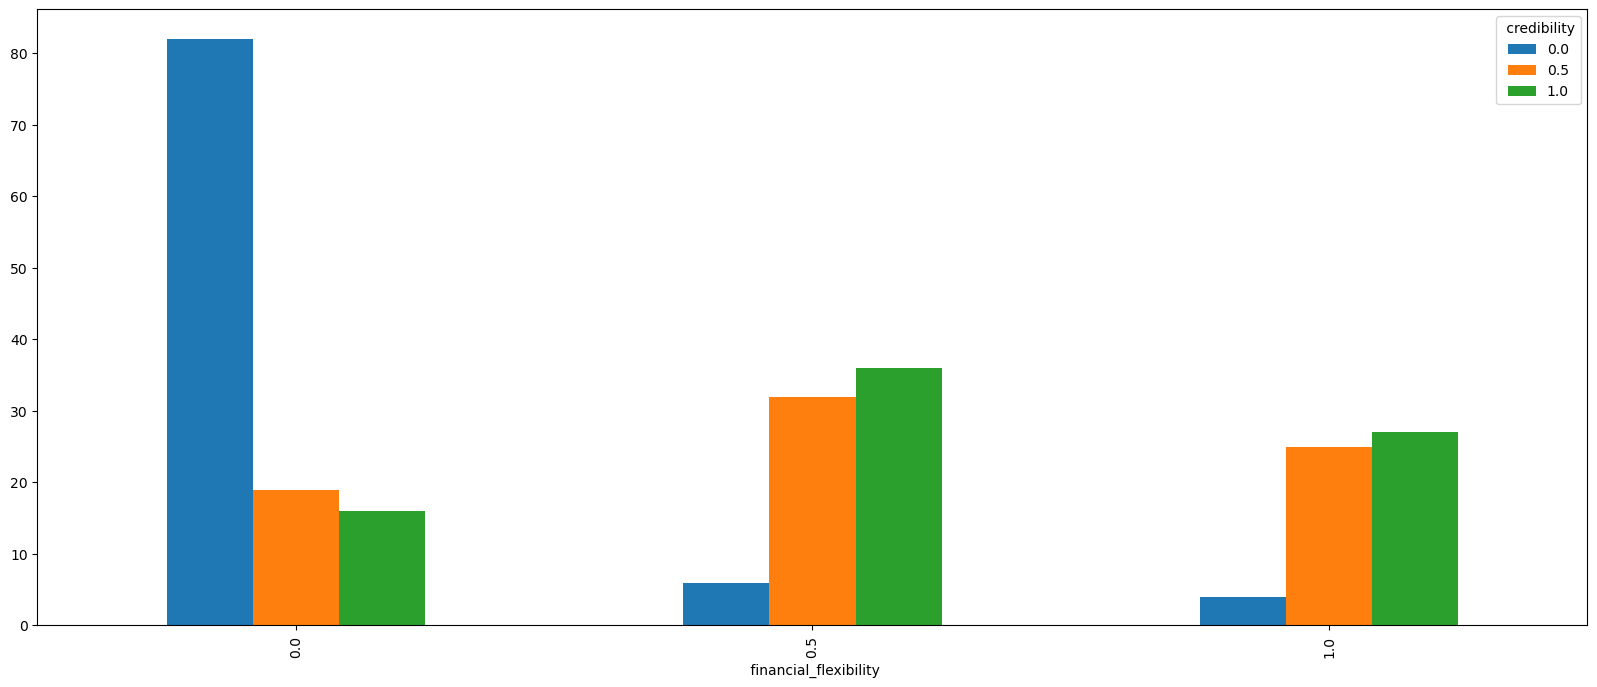

In [27]:
pd.crosstab(data[' financial_flexibility'],data[' credibility']).plot(kind='bar',figsize=(20,8))

In [28]:
data.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk',
       ' class_non-bankruptcy', 'scores', 'anomaly'],
      dtype='object')

<AxesSubplot:xlabel=' financial_flexibility'>

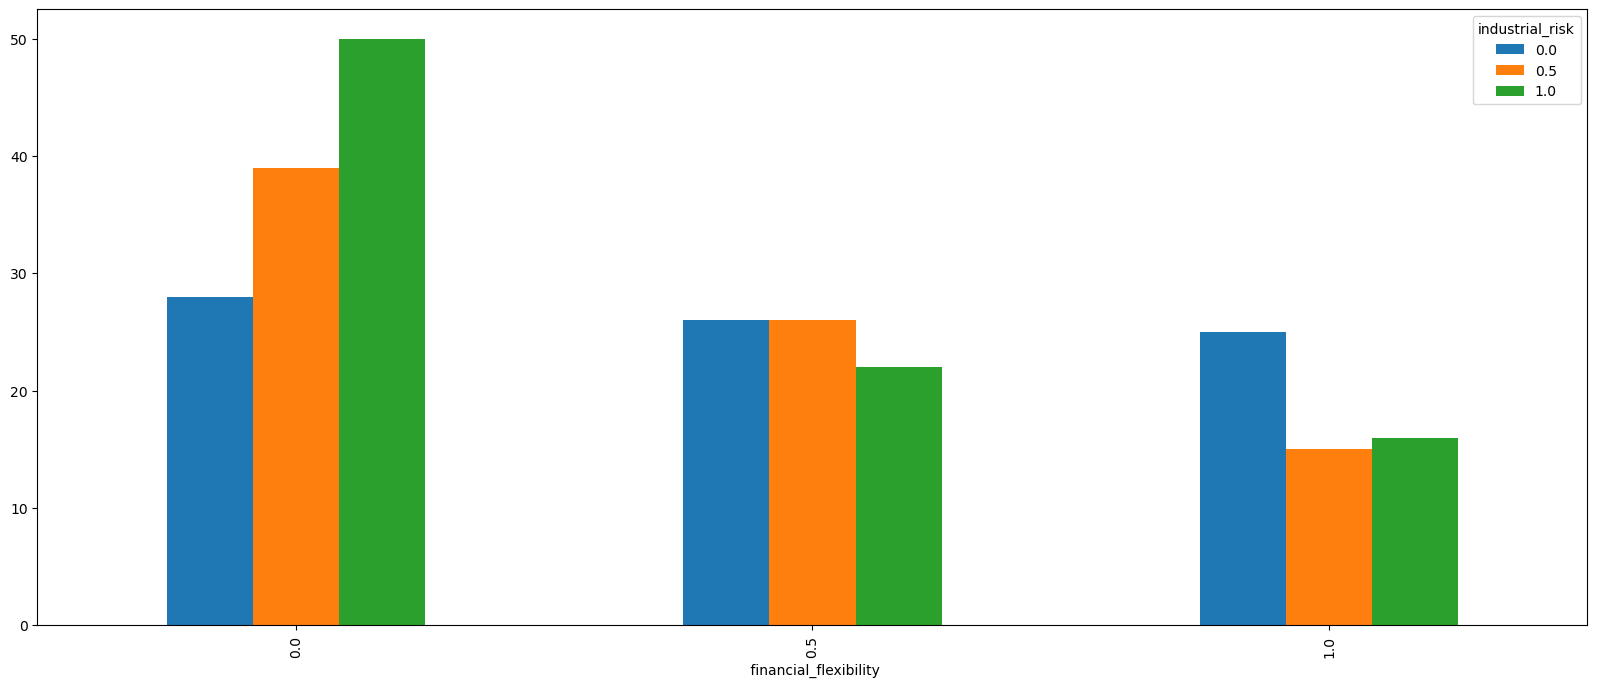

In [29]:
pd.crosstab(data[' financial_flexibility'],data['industrial_risk']).plot(kind='bar',figsize=(20,8))

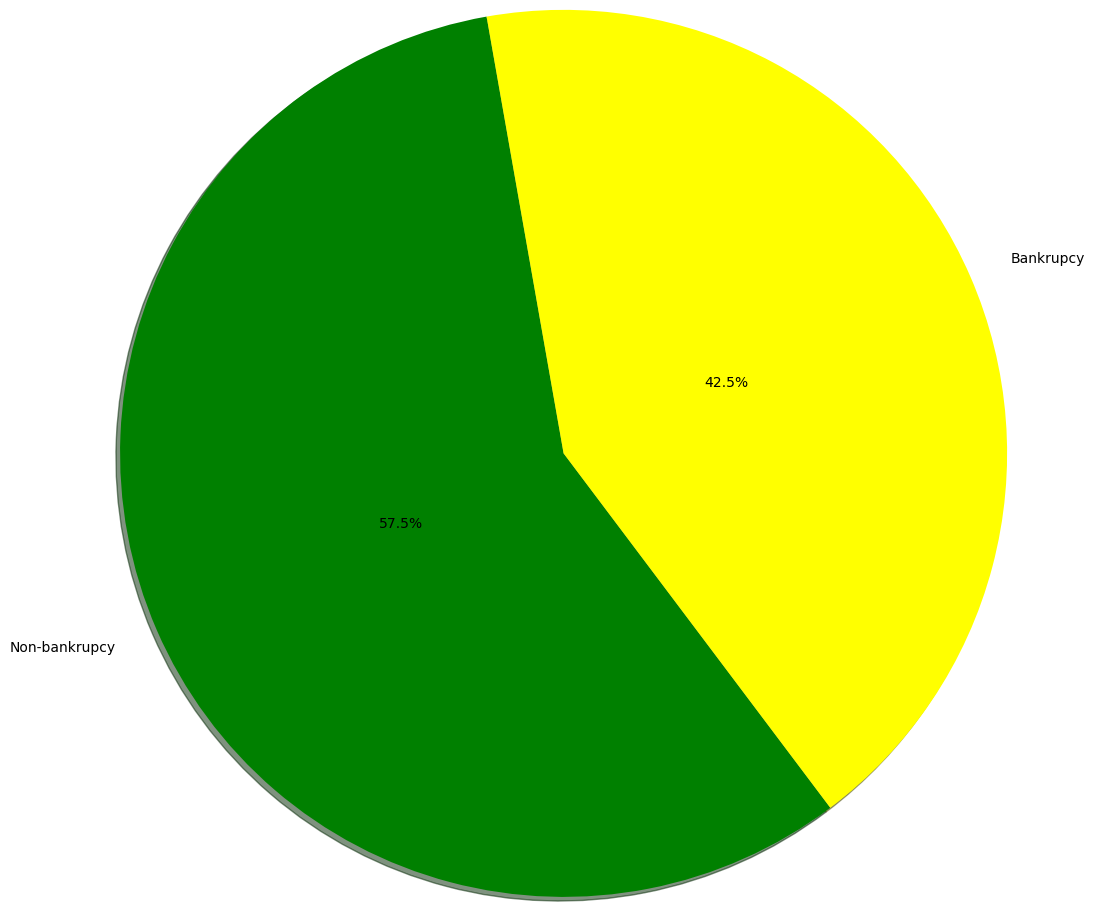

In [30]:
import matplotlib.pyplot as plt
exp_labels =['Non-bankrupcy','Bankrupcy']
exp_vals =data[' class_non-bankruptcy'].value_counts()
fbcolor = ["green", "yellow"]


plt.axis('equal')

plt.pie(exp_vals,labels=exp_labels, autopct='%1.1f%%',pctdistance=0.4,startangle=100,shadow=True,colors=fbcolor, radius=3)

plt.show()

# ***Model Building***

# ***Split the data into train and test***

In [31]:
X = data.iloc[:,0:6]
Y= data.iloc[:,6]

In [32]:
X

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
242,0.0,1.0,1.0,1.0,1.0,1.0
243,1.0,1.0,0.5,1.0,1.0,0.0
244,0.0,1.0,1.0,0.5,0.5,0.0
245,1.0,0.0,0.5,1.0,0.5,0.0


In [33]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
242    1
243    1
244    1
245    1
246    1
Name:  class_non-bankruptcy, Length: 247, dtype: uint8

In [34]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=.25,random_state=0)

# ***Logistic Regression Model***

In [35]:
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train,Y_train)

#Predict On Train Dataset
pred_train_LR =LR_classifier.predict(X_train)

#Accuracy On Train Dataset
train_acc_LR= np.mean(pred_train_LR == Y_train)
print("ACCURACY OF TRAIN DATASET IN LOGISTIC REGRESSION IS : ",train_acc_LR*100)

#Predict On Test Dataset
pred_test_LR = LR_classifier.predict(X_test)

#Accuracy On Test Dataset
test_acc_LR = np.mean(pred_test_LR == Y_test)
print("ACCURACY OF TEST DATASET IN LOGISTIC REGRESSION IS: ",test_acc_LR*100)

#Confusion Matrix
cm_LR= confusion_matrix(Y_test,pred_test_LR)
print('CONFUSION MATRIX :\n',cm_LR )

#Classificaton Report
cr_LR= classification_report(Y_test,pred_test_LR)
print('CLASSIFICATION REPORT OF LOGISTIC REGRESSION IS :\n',cr_LR)

ACCURACY OF TRAIN DATASET IN LOGISTIC REGRESSION IS :  100.0
ACCURACY OF TEST DATASET IN LOGISTIC REGRESSION IS:  100.0
CONFUSION MATRIX :
 [[21  0]
 [ 0 41]]
CLASSIFICATION REPORT OF LOGISTIC REGRESSION IS :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        41

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [36]:
accuracy_LR = (round(accuracy_score(Y_test,pred_test_LR),4))*100
precision_LR = (round(precision_score(Y_test,pred_test_LR,average='macro'),4))*100
recall_LR = (round(recall_score(Y_test,pred_test_LR,average='macro'),4))*100
f1_LR = (round(f1_score(Y_test,pred_test_LR,average='macro'),4))*100

#Printing Accuracy, Recall, Precision, F1_score
print('Accuracy Score   : ',accuracy_LR )
print('Precision Score  : ',precision_LR )
print('Recall Score     : ', recall_LR)
print('f1-Score         : ',f1_LR )

Accuracy Score   :  100.0
Precision Score  :  100.0
Recall Score     :  100.0
f1-Score         :  100.0


<AxesSubplot:title={'center':'Logistic Regression Classification'}>

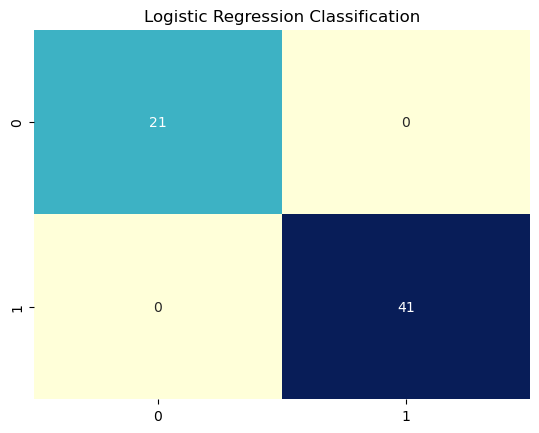

In [37]:
plt.subplot
plt.title("Logistic Regression Classification")
sns.heatmap(cm_LR, cbar=False, annot=True, cmap="YlGnBu",  fmt="d")

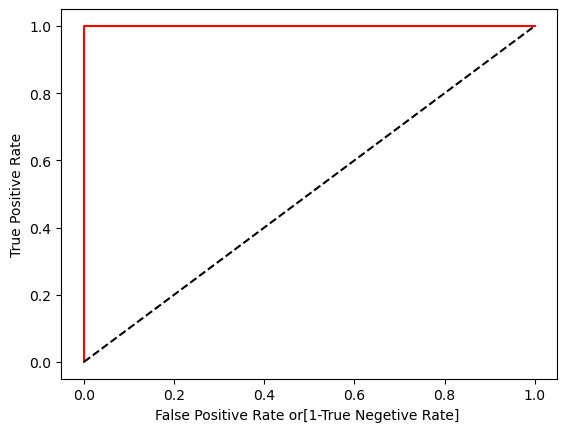

auc Accuracy 1.0


In [38]:
fpr,tpr,thresolds= roc_curve(Y_test, LR_classifier.predict_proba(X_test)[:,1])
auc= roc_auc_score(Y_test,pred_test_LR)
plt.plot(fpr,tpr,color='red',label='Logit Model(area= %0.2f)' %auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or[1-True Negetive Rate] ')
plt.ylabel('True Positive Rate')
plt.show()
print("auc Accuracy", auc)

# ***KNN Model Classifier***

In [39]:
KNN_classifier = KNeighborsClassifier(n_neighbors=7)
KNN_classifier.fit(X_train,Y_train)

#Predict On Train Dataset
pred_train_KNN =KNN_classifier.predict(X_train)

#Accuracy On Train Dataset
train_acc_KNN= np.mean(pred_train_KNN == Y_train)
print("ACCURACY OF TRAIN DATASET IN KNN IS : ",train_acc_KNN*100)

#Predict On Test Dataset
pred_test_KNN = KNN_classifier.predict(X_test)

#Accuracy On Test Dataset
test_acc_KNN = np.mean(pred_test_KNN == Y_test)
print("ACCURACY OF TEST DATASET IN KNN IS : ",test_acc_KNN*100)

#Confusion Matrix
cm_KNN= confusion_matrix(Y_test,pred_test_KNN)
print('CONFUSION MATRIX :\n',cm_KNN )

#Classificaton Report
cr_KNN= classification_report(Y_test,pred_test_KNN)
print('CLASSIFICATION REPORT OF KNN :\n',cr_KNN)

ACCURACY OF TRAIN DATASET IN KNN IS :  100.0
ACCURACY OF TEST DATASET IN KNN IS :  98.38709677419355
CONFUSION MATRIX :
 [[21  0]
 [ 1 40]]
CLASSIFICATION REPORT OF KNN :
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.98      0.99        41

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.98      0.98      0.98        62



In [40]:
accuracy_KNN = (round(accuracy_score(Y_test,pred_test_KNN),4))*100
precision_KNN = (round(precision_score(Y_test,pred_test_KNN,average='macro'),4))*100
recall_KNN = (round(recall_score(Y_test,pred_test_KNN,average='macro'),4))*100
f1_KNN = (round(f1_score(Y_test,pred_test_KNN,average='macro'),4))*100

#Printing Accuracy, Recall, Precision, F1_score
print('Accuracy Score   : ',accuracy_KNN )
print('Precision Score  : ',precision_KNN )
print('Recall Score     : ', recall_KNN)
print('f1-Score         : ',f1_KNN )

Accuracy Score   :  98.39
Precision Score  :  97.72999999999999
Recall Score     :  98.78
f1-Score         :  98.22


<AxesSubplot:title={'center':'K Nearest Neighbors Classification'}>

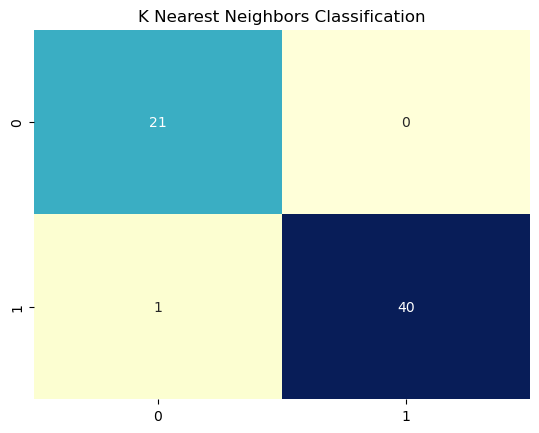

In [41]:
plt.subplot
plt.title("K Nearest Neighbors Classification")
sns.heatmap(cm_KNN, cbar=False, annot=True, cmap="YlGnBu",  fmt="d")

# ***Support Vector Machine(SVM) Classifier***

***Kernel="Linear"***

In [42]:
SVM_L_classifier = SVC(kernel='linear')
SVM_L_classifier.fit(X_train,Y_train)

#Predict On Train Dataset
pred_train_SVM_L =SVM_L_classifier.predict(X_train)

#Accuracy On Train Dataset
train_acc_SVM_L= np.mean(pred_train_SVM_L == Y_train)
print("ACCURACY OF TRAIN DATASET IN SVM IS : ",train_acc_SVM_L*100)

#Predict On Test Dataset
pred_test_SVM_L = SVM_L_classifier.predict(X_test)

#Accuracy On Test Dataset
test_acc_SVM_L = np.mean(pred_test_SVM_L == Y_test)
print("ACCURACY OF TEST DATASET IN SVM IS : ",test_acc_SVM_L*100)

#Confusion Matrix
cm_SVM_L= confusion_matrix(Y_test,pred_test_SVM_L)
print('CONFUSION MATRIX :\n',cm_SVM_L )

#Classificaton Report
cr_SVM_L= classification_report(Y_test,pred_test_SVM_L)
print('CLASSIFICATION REPORT OF SVM :\n',cr_SVM_L)

ACCURACY OF TRAIN DATASET IN SVM IS :  100.0
ACCURACY OF TEST DATASET IN SVM IS :  100.0
CONFUSION MATRIX :
 [[21  0]
 [ 0 41]]
CLASSIFICATION REPORT OF SVM :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        41

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [43]:
accuracy_SVM_L = (round(accuracy_score(Y_test,pred_test_SVM_L),4))*100
precision_SVM_L = (round(precision_score(Y_test,pred_test_SVM_L,average='macro'),4))*100
recall_SVM_L = (round(recall_score(Y_test,pred_test_SVM_L,average='macro'),4))*100
f1_SVM_L = (round(f1_score(Y_test,pred_test_SVM_L,average='macro'),4))*100

#Printing Accuracy, Recall, Precision, F1_score
print('Accuracy Score   : ',accuracy_SVM_L )
print('Precision Score  : ',precision_SVM_L )
print('Recall Score     : ', recall_SVM_L)
print('f1-Score         : ',f1_SVM_L )

Accuracy Score   :  100.0
Precision Score  :  100.0
Recall Score     :  100.0
f1-Score         :  100.0


***Kernel= 'Poly'***

In [44]:
SVM_P_classifier = SVC(kernel='poly')
SVM_P_classifier.fit(X_train,Y_train)

#Predict On Train Dataset
pred_train_SVM_P =SVM_P_classifier.predict(X_train)

#Accuracy On Train Dataset
train_acc_SVM_P= np.mean(pred_train_SVM_P == Y_train)
print("Accuracy Of train dataset is : ",train_acc_SVM_P*100)

#Predict On Test Dataset
pred_test_SVM_P = SVM_P_classifier.predict(X_test)

#Accuracy On Test Dataset
test_acc_SVM_P = np.mean(pred_test_SVM_P == Y_test)
print("Accuracy Of test dataset is : ",test_acc_SVM_P*100)

#Confusion Matrix
cm_SVM_P= confusion_matrix(Y_test,pred_test_SVM_P)
print('Confusion Matrix :\n',cm_SVM_P )

Accuracy Of train dataset is :  100.0
Accuracy Of test dataset is :  98.38709677419355
Confusion Matrix :
 [[21  0]
 [ 1 40]]


In [45]:
accuracy_SVM_P = (round(accuracy_score(Y_test,pred_test_SVM_P),4))*100
precision_SVM_P = (round(precision_score(Y_test,pred_test_SVM_P,average='macro'),4))*100
recall_SVM_P = (round(recall_score(Y_test,pred_test_SVM_P,average='macro'),4))*100
f1_SVM_P = (round(f1_score(Y_test,pred_test_SVM_P,average='macro'),4))*100

#Printing Accuracy, Recall, Precision, F1_score
print('Accuracy Score   : ',accuracy_SVM_P )
print('Precision Score  : ',precision_SVM_P )
print('Recall Score     : ', recall_SVM_P)
print('f1-Score         : ',f1_SVM_P )

Accuracy Score   :  98.39
Precision Score  :  97.72999999999999
Recall Score     :  98.78
f1-Score         :  98.22


***Kernel='rbf'(Radial basis Function)***

In [46]:
SVM_rbf_classifier = SVC(kernel='rbf')
SVM_rbf_classifier.fit(X_train,Y_train)

#Predict On Train Dataset
pred_train_SVM_rbf =SVM_rbf_classifier.predict(X_train)

#Accuracy On Train Dataset
train_acc_SVM_rbf= np.mean(pred_train_SVM_rbf == Y_train)
print("Accuracy Of train dataset is : ",train_acc_SVM_rbf*100)

#Predict On Test Dataset
pred_test_SVM_rbf = SVM_rbf_classifier.predict(X_test)

#Accuracy On Test Dataset
test_acc_SVM_rbf = np.mean(pred_test_SVM_rbf == Y_test)
print("Accuracy Of test dataset is : ",test_acc_SVM_rbf*100)

#Confusion Matrix
cm_SVM_rbf= confusion_matrix(Y_test,pred_test_SVM_rbf)
print('Confusion Matrix :\n',cm_SVM_rbf )

Accuracy Of train dataset is :  100.0
Accuracy Of test dataset is :  100.0
Confusion Matrix :
 [[21  0]
 [ 0 41]]


In [47]:
accuracy_SVM_rbf = (round(accuracy_score(Y_test,pred_test_SVM_rbf),4))*100
precision_SVM_rbf = (round(precision_score(Y_test,pred_test_SVM_rbf,average='macro'),4))*100
recall_SVM_rbf = (round(recall_score(Y_test,pred_test_SVM_rbf,average='macro'),4))*100
f1_SVM_rbf = (round(f1_score(Y_test,pred_test_SVM_rbf,average='macro'),4))*100

#Printing Accuracy, Recall, Precision, F1_score
print('Accuracy Score   : ',accuracy_SVM_rbf )
print('Precision Score  : ',precision_SVM_rbf)
print('Recall Score     : ', recall_SVM_rbf)
print('f1-Score         : ',f1_SVM_rbf )

Accuracy Score   :  100.0
Precision Score  :  100.0
Recall Score     :  100.0
f1-Score         :  100.0


# ***Naive Bayes Classifier***

***Multinomial Naive Bayes***

In [48]:
MB_classifier = MB()
MB_classifier.fit(X_train,Y_train)

#Predict On Train Dataset
pred_train_MB =MB_classifier.predict(X_train)

#Accuracy On Train Dataset
train_acc_MB= np.mean(pred_train_MB == Y_train)
print("Accuracy Of train dataset is : ",train_acc_MB*100)

#Predict On Test Dataset
pred_test_MB = MB_classifier.predict(X_test)

#Accuracy On Test Dataset
test_acc_MB = np.mean(pred_test_MB == Y_test)
print("Accuracy Of test dataset is : ",test_acc_MB*100)

#Confusion Matrix
cm_MB= confusion_matrix(Y_test,pred_test_MB)
print('Confusion Matrix :\n',cm_MB )

Accuracy Of train dataset is :  97.83783783783784
Accuracy Of test dataset is :  100.0
Confusion Matrix :
 [[21  0]
 [ 0 41]]


In [49]:

accuracy_MB = (round(accuracy_score(Y_test,pred_test_MB),4))*100
precision_MB = (round(precision_score(Y_test,pred_test_MB,average='macro'),4))*100
recall_MB = (round(recall_score(Y_test,pred_test_MB,average='macro'),4))*100
f1_MB = (round(f1_score(Y_test,pred_test_MB,average='macro'),4))*100

#Printing Accuracy, Recall, Precision, F1_score
print('Accuracy Score   : ',accuracy_MB )
print('Precision Score  : ',precision_MB )
print('Recall Score     : ', recall_MB)
print('f1-Score         : ',f1_MB )

Accuracy Score   :  100.0
Precision Score  :  100.0
Recall Score     :  100.0
f1-Score         :  100.0


***Gaussian Naive Bayes***

In [50]:
GB_classifier = GB()
GB_classifier.fit(X_train,Y_train)

#Predict On Train Dataset
pred_train_GB =GB_classifier.predict(X_train)

#Accuracy On Train Dataset
train_acc_GB= np.mean(pred_train_GB == Y_train)
print("Accuracy Of train dataset is : ",train_acc_GB*100)

#Predict On Test Dataset
pred_test_GB = GB_classifier.predict(X_test)

#Accuracy On Test Dataset
test_acc_GB = np.mean(pred_test_GB == Y_test)
print("Accuracy Of test dataset is : ",test_acc_GB*100)

#Confusion Matrix
cm_GB= confusion_matrix(Y_test,pred_test_GB)
print('Confusion Matrix :\n',cm_GB )

Accuracy Of train dataset is :  97.83783783783784
Accuracy Of test dataset is :  100.0
Confusion Matrix :
 [[21  0]
 [ 0 41]]


In [51]:
accuracy_GB = (round(accuracy_score(Y_test,pred_test_GB),4))*100
precision_GB = (round(precision_score(Y_test,pred_test_GB,average='macro'),4))*100
recall_GB = (round(recall_score(Y_test,pred_test_GB,average='macro'),4))*100
f1_GB = (round(f1_score(Y_test,pred_test_GB,average='macro'),4))*100

#Printing Accuracy, Recall, Precision, F1_score
print('Accuracy Score   : ',accuracy_GB )
print('Precision Score  : ',precision_GB )
print('Recall Score     : ', recall_GB)
print('f1-Score         : ',f1_GB )

Accuracy Score   :  100.0
Precision Score  :  100.0
Recall Score     :  100.0
f1-Score         :  100.0



# ***Random Forest Classifier***

In [52]:
RF = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
RF_classifier = RandomForestClassifier(**RF)
RF_classifier.fit(X_train,Y_train)

#Predicting on Train Data
pred_train_rf = RF_classifier.predict(X_train)
#Accuracy On Train Data
train_acc_rf = np.mean(pred_train_rf==Y_train)
print("ACCURACY OF TRAIN DATA IN RANDOM FOREST:",train_acc_rf*100)

#Predicting on Test Data
pred_test_rf = RF_classifier.predict(X_test)
#Accuracy On Test Data
test_acc_rf = np.mean(pred_test_rf==Y_test)
print("ACCURACY OF TEST DATA IN RANDOM FOREST:",test_acc_rf*100 )

#Confusion Matrix
rf_cm = confusion_matrix(Y_test,pred_test_rf)
print("Confusion Matrix :",rf_cm)

#Classification Report
print("CLASSIFICATION REPORT OF RANDOM FOREST:\n", classification_report(Y_test,pred_test_rf))

ACCURACY OF TRAIN DATA IN RANDOM FOREST: 100.0
ACCURACY OF TEST DATA IN RANDOM FOREST: 98.38709677419355
Confusion Matrix : [[21  0]
 [ 1 40]]
CLASSIFICATION REPORT OF RANDOM FOREST:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.98      0.99        41

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.98      0.98      0.98        62



In [53]:
accuracy_rf = (round(accuracy_score(Y_test,pred_test_rf),4))*100
precision_rf = (round(precision_score(Y_test,pred_test_rf,average = 'macro'),4)*100)
recall_rf = (round(recall_score(Y_test,pred_test_rf,average = 'macro'),4))*100
f1_rf = (round(f1_score(Y_test,pred_test_rf,average = 'macro'),4))*100

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_rf )
print('Precision Score  : ',precision_rf )
print('Recall Score     : ', recall_rf)
print('f1-Score         : ',f1_rf )

Accuracy Score   :  98.39
Precision Score  :  97.72999999999999
Recall Score     :  98.78
f1-Score         :  98.22


<AxesSubplot:title={'center':'RANDOM FOREST CLASSIFICATION'}>

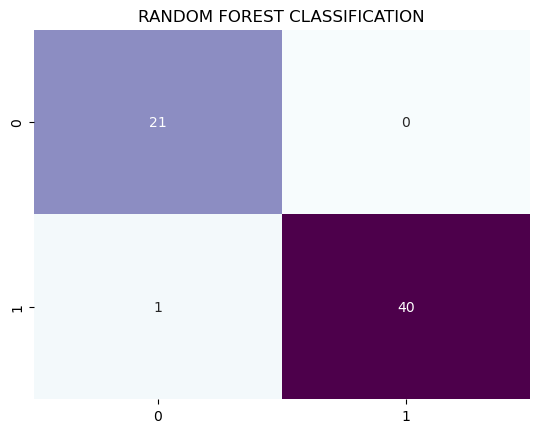

In [54]:
plt.subplot
plt.title("RANDOM FOREST CLASSIFICATION")
sns.heatmap(rf_cm, cbar=False, annot=True, cmap="BuPu", fmt="d")

# ***Decision Tree Classifier***

In [55]:
DT= DecisionTreeClassifier()
DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=2)
DT_classifier.fit(X_train,Y_train)

#Predicting on Train Data
pred_train_DT = DT_classifier.predict(X_train)
#Accuracy On Train Data
train_acc_DT = np.mean(pred_train_DT==Y_train)
print("ACCURACY OF TRAIN DATA IN DECISION TREE:",train_acc_DT)

#Predicting on Test Data
pred_test_DT = DT_classifier.predict(X_test)
#Accuracy On Test Data
test_acc_DT = np.mean(pred_test_DT==Y_test)
print("ACCURACY OF TEST DATA IN DECISION TREE:",test_acc_DT )

#Confusion Matrix
DT_cm = confusion_matrix(Y_test,pred_test_DT)
print("CONFUSION MATRIX :",DT_cm)

#Classification Report
print("CLASSIFICATION REPORT OF DECISION TREE:\n", classification_report(Y_test,pred_test_DT))

ACCURACY OF TRAIN DATA IN DECISION TREE: 0.9783783783783784
ACCURACY OF TEST DATA IN DECISION TREE: 0.967741935483871
CONFUSION MATRIX : [[21  0]
 [ 2 39]]
CLASSIFICATION REPORT OF DECISION TREE:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.95      0.97        41

    accuracy                           0.97        62
   macro avg       0.96      0.98      0.96        62
weighted avg       0.97      0.97      0.97        62



In [56]:
accuracy_DT = (round(accuracy_score(Y_test,pred_test_DT),4))*100
precision_DT = (round(precision_score(Y_test,pred_test_DT,average = 'macro'),4))*100
recall_DT = (round(recall_score(Y_test,pred_test_DT,average = 'macro'),4)*100)
f1_DT = (round(f1_score(Y_test,pred_test_DT,average = 'macro'),4))*100

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_DT )
print('Precision Score  : ',precision_DT )
print('Recall Score     : ', recall_DT)
print('f1-Score         : ',f1_DT )

Accuracy Score   :  96.77
Precision Score  :  95.65
Recall Score     :  97.56
f1-Score         :  96.48


<AxesSubplot:title={'center':'DECISION TREE CLASSIFICATION'}>

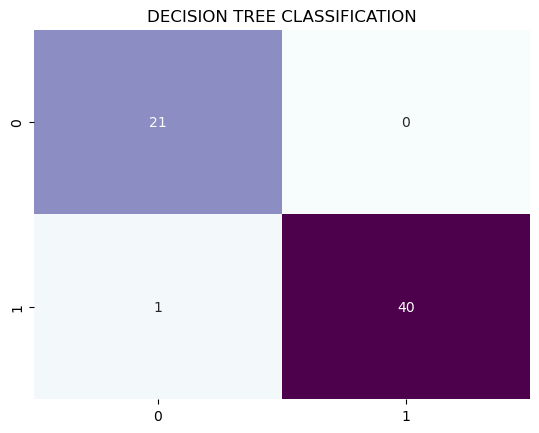

In [57]:
plt.subplot
plt.title("DECISION TREE CLASSIFICATION")
sns.heatmap(rf_cm, cbar=False, annot=True, cmap="BuPu", fmt="d")

In [58]:
table = {'Classifier' : ['LOGISTIC REGRESSION','KNN CLASSIFIER','SUPPORT VECTOR MACHINE(Kernel=Linear)','SUPPORT VECTOR MACHINE(Kernel=Poly)','SUPPORT VECTOR MACHINE(Kernel=rbf)', 'MULTINOMIAL NAIVE BAYES','GAUSSIAN NAIVE BAYES','RANDOM FOREST', 'DECISION TREE'],'Train Accuracy' : [train_acc_LR*100,train_acc_KNN*100,train_acc_SVM_L*100,train_acc_SVM_P*100,train_acc_SVM_rbf*100,train_acc_MB*100,train_acc_GB*100,train_acc_rf*100,train_acc_DT*100] ,'Accuracy_Score' : [accuracy_LR, accuracy_KNN, accuracy_SVM_L, accuracy_SVM_P, accuracy_SVM_rbf,accuracy_MB,accuracy_GB,accuracy_rf,accuracy_DT], 'Precision_Score' : [ precision_LR, precision_KNN, precision_SVM_L, precision_SVM_P, precision_SVM_rbf,precision_MB,precision_GB,precision_rf,precision_DT], 'Recall_Score' : [ recall_LR, recall_KNN, recall_SVM_L, recall_SVM_P, recall_SVM_rbf,recall_MB,recall_GB,recall_rf,recall_DT], 'F1-Score' : [ f1_LR, f1_KNN, f1_SVM_L, f1_SVM_P, f1_SVM_rbf,f1_MB,f1_GB,f1_rf,f1_DT]}
table = pd.DataFrame(table)
table

,Classifier,Train Accuracy,Accuracy_Score,Precision_Score,Recall_Score,F1-Score
0,LOGISTIC REGRESSION,100.000000,100.00,100.00,100.00,100.00
1,KNN CLASSIFIER,100.000000,98.39,97.73,98.78,98.22
2,SUPPORT VECTOR MACHINE(Kernel=Linear),100.000000,100.00,100.00,100.00,100.00
3,SUPPORT VECTOR MACHINE(Kernel=Poly),100.000000,98.39,97.73,98.78,98.22
4,SUPPORT VECTOR MACHINE(Kernel=rbf),100.000000,100.00,100.00,100.00,100.00
5,MULTINOMIAL NAIVE BAYES,97.837838,100.00,100.00,100.00,100.00
6,GAUSSIAN NAIVE BAYES,97.837838,100.00,100.00,100.00,100.00
7,RANDOM FOREST,100.000000,98.39,97.73,98.78,98.22
8,DECISION TREE,97.837838,96.77,95.65,97.56,96.48


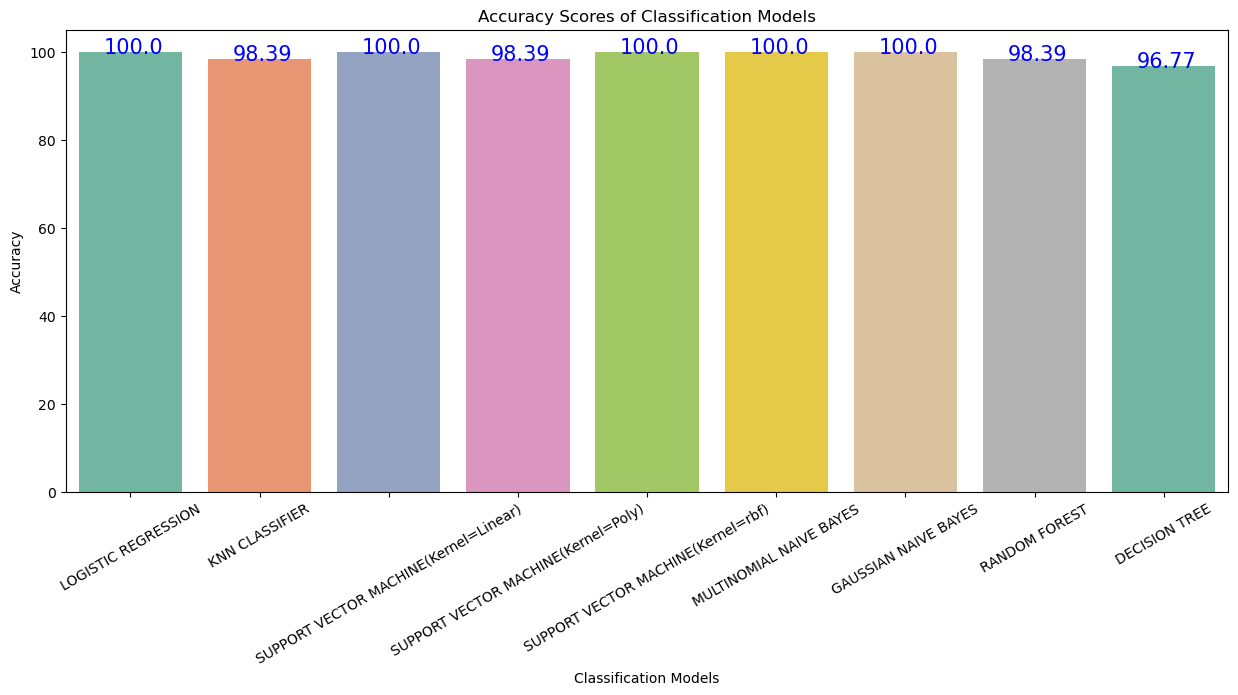

In [59]:
#Accuracy
plt.figure(figsize=(15,6))
ax= sns.barplot(x=table.Classifier, y=table.Accuracy_Score, palette =sns.color_palette("Set2") )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()

***Among these 8 model i choose SVM(poly) for final model because it gives good accuracy - 98.39%. and SVM is best for small dataset.***

# ***Create Pickle file***

In [60]:
import pickle
pickle_out = open('SVM_P_classifier.pkl','wb') 
pickle.dump(SVM_P_classifier,pickle_out)
pickle_out.close()